In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Nadi_Pariksha_Dataset.csv")

# Encode target variable
le = LabelEncoder()
df["Dosha_Type"] = le.fit_transform(df["Dosha_Type"])

# Split data into features and target
X = df.drop(columns=["Dosha_Type"])
y = df["Dosha_Type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.33%


5-Fold Cross-Validation Accuracy: 98.47%
  Predicted_Dosha_Type                                     Recommendation
0                 Vata  You should focus on staying warm and grounded....
1                Pitta  Cooling foods and relaxation techniques can he...
2                Pitta  Cooling foods and relaxation techniques can he...
3          Kapha-Pitta  Balance your fiery nature with cooling, yet st...
4                 Vata  You should focus on staying warm and grounded....


<Figure size 1000x600 with 0 Axes>

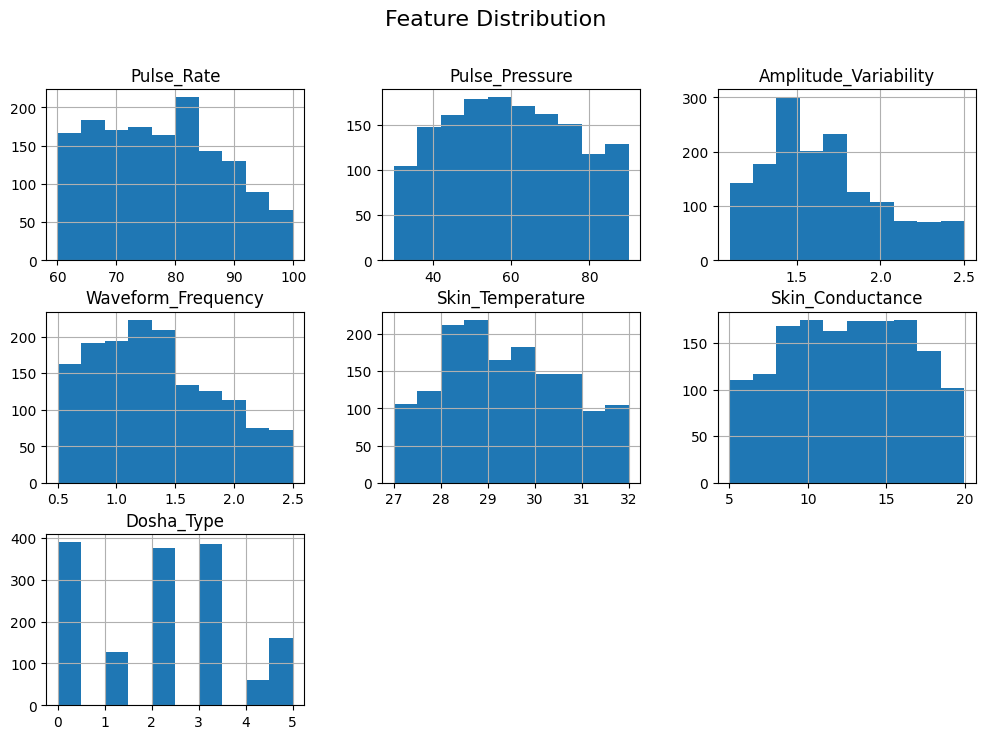

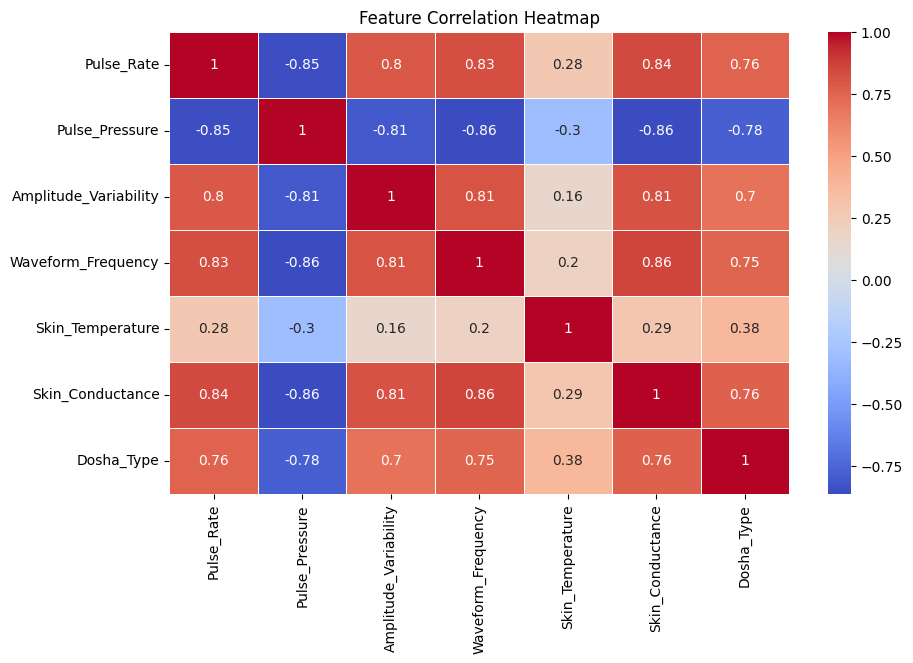

<ipython-input-19-341aa7d6f037>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Predicted_Dosha_Type", data=df, palette="viridis")


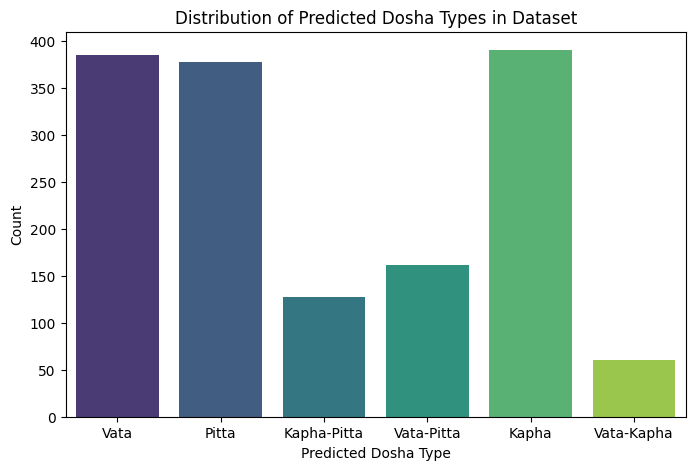

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("Nadi_Pariksha_Dataset.csv")

# Encode target variable
le = LabelEncoder()
df["Dosha_Type"] = le.fit_transform(df["Dosha_Type"])

# Split data into features and target
X = df.drop(columns=["Dosha_Type"])
y = df["Dosha_Type"]

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
average_accuracy = np.mean(cv_scores)
print(f"5-Fold Cross-Validation Accuracy: {average_accuracy * 100:.2f}%")

# Train the model on the entire dataset
model.fit(X, y)

# Predict for the entire dataset
predictions = model.predict(X)
df["Predicted_Dosha_Type"] = le.inverse_transform(predictions)

# Provide recommendations based on Dosha Type (including combinations)
def give_recommendation(dosha_type):
    recommendations = {
        "Vata": "You should focus on staying warm and grounded. Include calming activities like meditation and yoga.",
        "Pitta": "Cooling foods and relaxation techniques can help you stay balanced. Avoid overheating and stress.",
        "Kapha": "Stimulation and movement are key for you. Engage in vigorous physical activities and avoid heavy foods.",
        "Vata-Pitta": "Ensure you stay balanced with a mix of calming and cooling practices. Yoga and cooling foods work well for you.",
        "Kapha-Pitta": "Balance your fiery nature with cooling, yet stimulating activities. Avoid heavy foods and stress.",
        "Vata-Kapha": "Balance your grounded nature with invigorating activities. Ensure warmth and grounding practices to stay centered."
    }
    return recommendations.get(dosha_type, "No recommendation available.")

# Apply recommendations to each row in the dataset
df["Recommendation"] = df["Predicted_Dosha_Type"].apply(give_recommendation)

# Display the table with predicted Dosha types and recommendations
print(df[["Predicted_Dosha_Type", "Recommendation"]].head())

# ---- Data Visualization ----

# 1. Feature Distribution
plt.figure(figsize=(10, 6))
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Predicted Dosha Count
plt.figure(figsize=(8, 5))
sns.countplot(x="Predicted_Dosha_Type", data=df, palette="viridis")
plt.title("Distribution of Predicted Dosha Types in Dataset")
plt.xlabel("Predicted Dosha Type")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Nadi_Pariksha_Dataset.csv")

# Encode target variable
le = LabelEncoder()
df["Dosha_Type"] = le.fit_transform(df["Dosha_Type"])

# Split data into features and target
X = df.drop(columns=["Dosha_Type"])
y = df["Dosha_Type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set and compute accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predict for a new individual sample
new_sample = np.array([[85.0, 50.0, 2.1, 1.8, 30.5, 14.0]])  # Example input
predicted_dosha_individual = le.inverse_transform(model.predict(new_sample))

print("Predicted Dosha Type for Individual:", predicted_dosha_individual[0])


Model Accuracy: 99.33%
Predicted Dosha Type for Individual: Vata-Pitta


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Example new test data (replace with actual feature values)
new_test_data = np.array([
    [85.0, 50.0, 2.1, 1.8, 30.5, 14.0],  # Example input 1
    [72.0, 60.0, 1.5, 1.2, 31.0, 13.5]   # Example input 2
])

# Replace with correct actual labels in text form
actual_labels_text = ["Vata", "Pitta"]  # Replace with actual Dosha labels

# Convert actual labels to encoded form
actual_labels_encoded = le.transform(actual_labels_text)

# Predict Dosha for new test data
new_predictions = model.predict(new_test_data)

# Compute accuracy
new_accuracy = accuracy_score(actual_labels_encoded, new_predictions)
print(f"Accuracy on new data: {new_accuracy * 100:.2f}%")


Accuracy on new data: 50.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# New sample data (replace with actual values)
new_sample = np.array([[85.0, 50.0, 2.1, 1.8, 30.5, 14.0]])  # Example input

# Predict Dosha Type
predicted_dosha = model.predict(new_sample)

# Convert encoded label back to original Dosha Type
predicted_dosha_type = le.inverse_transform(predicted_dosha)

print("Predicted Dosha Type:", predicted_dosha_type[0])


Predicted Dosha Type: Vata-Pitta


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# New test samples (Replace with actual feature values)
new_test_data = np.array([
    [85.0, 50.0, 2.1, 1.8, 30.5, 14.0],  # Example input
    [72.0, 60.0, 1.5, 1.2, 31.0, 13.5]   # Another example
])

# Predict Dosha Type
new_predictions = model.predict(new_test_data)

# Convert predictions back to original labels
predicted_dosha_types = le.inverse_transform(new_predictions)

print("Predicted Dosha Types:", predicted_dosha_types)



Predicted Dosha Types: ['Vata-Pitta' 'Pitta']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Replace with real labels in text form
actual_labels_text = ["Vata", "Pitta"]  # Replace with correct dosha labels

# Convert actual labels to encoded form
actual_labels_encoded = le.transform(actual_labels_text)

# Compute accuracy
new_accuracy = accuracy_score(actual_labels_encoded, new_predictions)
print(f"Accuracy on new data: {new_accuracy * 100:.2f}%")


Accuracy on new data: 50.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset (Replace with your actual file)
df = pd.read_csv('Nadi_Pariksha_Dataset.csv')

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical target variable Dosha_Type to numeric
# If only "Vata", "Pitta", "Kapha" are present:
if df['Dosha_Type'].nunique() <= 3:
    label_encoder = LabelEncoder()
    df['Dosha_Type'] = label_encoder.fit_transform(df['Dosha_Type'])
    y = df['Dosha_Type']  # Target variable is now a 1D array
else:  # If mixed Dosha types exist (e.g., "Vata-Kapha")
    df = pd.get_dummies(df, columns=['Dosha_Type'])
    # Select the column corresponding to the desired target for multi-class classification
    # For example, if you want to predict 'Dosha_Type_Vata':
    y = df['Dosha_Type_Vata']  # Replace with your desired target column

# Separate Features and Target
X = df.drop(columns=[col for col in df.columns if "Dosha_Type" in col])


# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC()
}

# Train and Evaluate Models
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) # Use y_test directly for accuracy calculation

    print(f"\n{name} Model Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred)) # Use y_test directly

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

# Final Evaluation
y_pred_final = best_model.predict(X_test)
print("\nFinal Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))  # Use y_test directly
print("Classification Report:\n", classification_report(y_test, y_pred_final)) # Use y_test directly


Logistic Regression Model Accuracy: 0.9867
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       225
        True       0.97      0.97      0.97        75

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300


Random Forest Model Accuracy: 0.9967
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       225
        True       0.99      1.00      0.99        75

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


XGBoost Model Accuracy: 0.9933
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       225
        True       0.99      0.99      0.99        75

    accuracy                           0.99       300
   macro avg  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:26:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
